Desafio 3:  Machine Learning

Andrea Christie

1. Realizar un análisis exploratorio de los datos para comprender las características y la distribución de los datos.

In [40]:
#cargado base de datos Telco-Customer-Churn.xlsx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10, 6)


In [2]:
df = pd.read_excel('Telco-Customer-Churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
from exploracion3 import calidad_datos, graficos, no_atipicos, correlacion

In [5]:
calidad = calidad_datos(df)
calidad
#se puede observar una gran cantidad de columnas catégoricas siendo Churn una

,tipo,nan,porcentaje_nan,ceros,porcentaje_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,IQR,lim_inf,lim_sup,atipicos
SeniorCitizen,int64,0,0.000000,5901,83.785319,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1142
tenure,int64,0,0.000000,11,0.156183,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0,46.0,-60.0,124.0,0
MonthlyCharges,float64,0,0.000000,0,0.000000,7043.0,NaN,NaN,NaN,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75,54.35,-46.025,171.375,0
TotalCharges,float64,11,0.156183,0,0.000000,7032.0,NaN,NaN,NaN,2283.300441,2266.771362,18.8,401.45,1397.475,3794.7375,8684.8,3393.2875,-4688.48125,8884.66875,0
customerID,object,0,0.000000,0,0.000000,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
PaymentMethod,object,0,0.000000,0,0.000000,7043,4,Electronic check,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
PaperlessBilling,object,0,0.000000,0,0.000000,7043,2,Yes,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Contract,object,0,0.000000,0,0.000000,7043,3,Month-to-month,3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
StreamingMovies,object,0,0.000000,0,0.000000,7043,3,No,2785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
StreamingTV,object,0,0.000000,0,0.000000,7043,3,No,2810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
df.columns
#son 21 columnas.

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

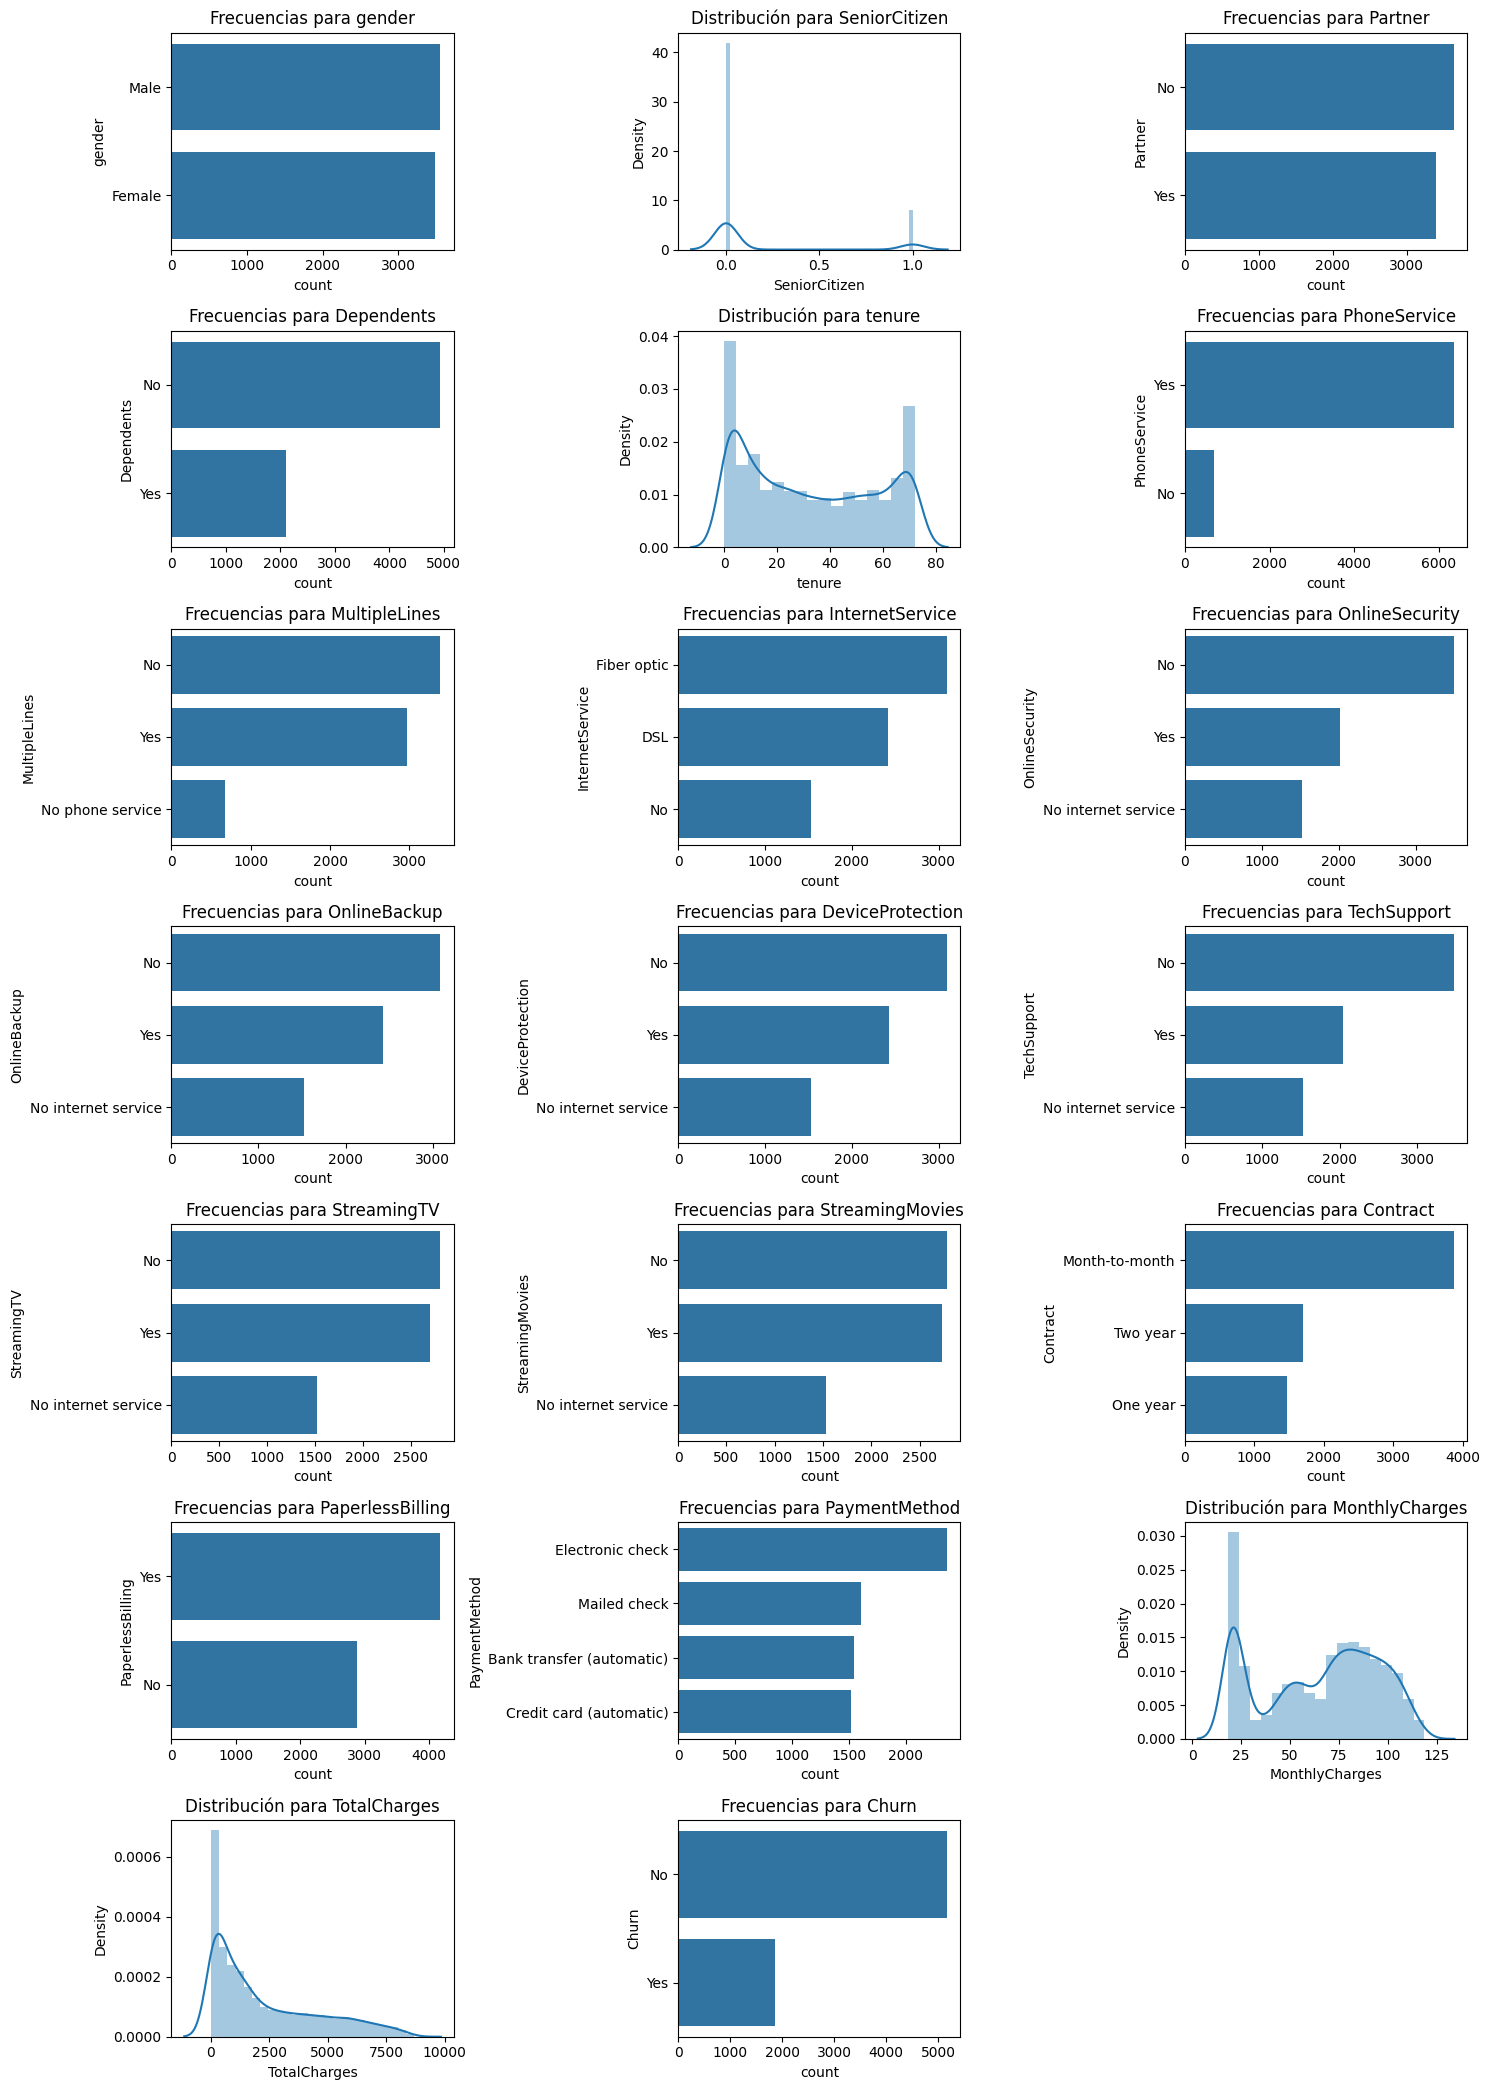

In [7]:
#revisando la distribución de los datos.
# No se graficará la columna customerID
graficos(calidad_datos(df), df, df.columns[1:22])

In [8]:
#no se utilizará la columna customerID
df_filtrado = df.drop(columns = ['customerID'])

In [9]:
#revisando la correlación de Pearson y correlación de test de Chi^2 de contingencia
#creando nueva columna para cambiar el formato de la columna
df_filtrado['Churn_binario'] = np.where(df_filtrado['Churn']=='Yes',1, 0)
df_filtrado.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binario
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [10]:
#solicitando la correlacion de pearson y del Chi^2
df_filtrado.drop(columns = ['Churn'], inplace = True)
numeric_features, categorical_features = correlacion(df_filtrado, 'Churn_binario')

Correlación de Pearson entre SeniorCitizen y Churn_binario: 0.15
Correlación de Pearson entre tenure y Churn_binario: -0.35
Correlación de Pearson entre MonthlyCharges y Churn_binario: 0.19
Correlación de Pearson entre TotalCharges y Churn_binario: -0.20
Correlación de Pearson entre Churn_binario y Churn_binario: 1.00
Chi-cuadrado entre gender y Churn_binario: 0.48, p-value: 0.4866. Las variables son independientes.
Chi-cuadrado entre Partner y Churn_binario: 158.73, p-value: 0.0000. Hay relación entre las variables.
Chi-cuadrado entre Dependents y Churn_binario: 189.13, p-value: 0.0000. Hay relación entre las variables.
Chi-cuadrado entre PhoneService y Churn_binario: 0.92, p-value: 0.3388. Las variables son independientes.
Chi-cuadrado entre MultipleLines y Churn_binario: 11.33, p-value: 0.0035. Hay relación entre las variables.
Chi-cuadrado entre InternetService y Churn_binario: 732.31, p-value: 0.0000. Hay relación entre las variables.
Chi-cuadrado entre OnlineSecurity y Churn_bina

In [11]:
#limpiando la columna Total charges que tiene 11 nan
df_filtrado.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [12]:
df_filtrado.dropna(inplace=True)

2. Preprocesar los datos, incluyendo la limpieza, la transformación y la normalización de las características según sea necesario.

In [13]:
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [20]:
#GPT #convertir columnas categoricas (object) a numericas.
label_encoders = LabelEncoder()
for column in categorical_features:
  df_filtrado[column] = label_encoders.fit_transform(df_filtrado[column])

In [21]:
  df_filtrado.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_binario
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [22]:
# Separar cvariables independiente y variable objetivo
X = df_filtrado.drop('Churn_binario', axis =1)   # Eliminamos la columna objetivo del dataset
y = df_filtrado['Churn_binario'] #'Churn_binario' es la columna objetivo

3. Dividir los datos en conjuntos de entrenamiento y prueba. (1 Puntos)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
numeric_features
#eliminar Churn_binario

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_binario']

In [26]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [27]:
nuevas_numericas = []
for nombre in X.columns:
  if nombre not in categorical_features:
    nuevas_numericas.append(nombre)


In [28]:
nuevas_numericas

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [29]:
#Escalar las variables numericas para corregir las medias a 0 y 1.
scaler = StandardScaler()
X_train[nuevas_numericas] = scaler.fit_transform(X_train[nuevas_numericas])
X_test[nuevas_numericas] = scaler.transform(X_test[nuevas_numericas])

4. Entrenar al menos 3 algoritmos y optimizar sus hiperparametros (4 Puntos)

In [33]:
#Entremaniemto modelo 1 KNN
#definiendo los valores de hiperparámetros para el modelos KNN
param_grid = {
    'n_neighbors': [3,5,7,9],
    'metric': ['euclidean', 'manhattan'],
}

#crear y entrenar el modelo KNN con GridSearch
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, n_jobs = -1)
grid_search_knn.fit(X_train, y_train)

#mejor modelo con los mejores hiperparametros
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

#evaluar el rendimiento del modelos KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(grid_search_knn.best_params_)
print(f'Accuracy de KNN con mejores hiperparametros: {accuracy_knn}')

{'metric': 'manhattan', 'n_neighbors': 9}
Accuracy de KNN con mejores hiperparametros: 0.7455579246624022


In [ ]:
# 9 vecino y con buen valor de hiperparametro = 0.7455

In [34]:
#segundo modelo Decision Tree
#hiperparametros para Decision Tree
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#creando y entrenando modelos de decisión con GridSearchCV
tree = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, n_jobs = -1)
grid_search_tree.fit(X_train, y_train)

#mejor modelo con los mejores hiperparametros
best_tree = grid_search_tree.best_estimator_
y_pred_tree = best_tree.predict(X_test)

#evaluar el rendimiento del modelos Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(grid_search_tree.best_params_)
print(f'Accuracy de Decision Tree con mejores hiperparametros: {accuracy_tree}')

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy de Decision Tree con mejores hiperparametros: 0.7882018479033405


In [ ]:
#la exactitud del modelo es muy alto 0.7882 es más alto que el KNN

In [37]:
#tercer modelo - Naive Bayer
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
#crear y entrenar el modelo de Naive Bayer con GridSearchCV
nb = GaussianNB()
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, n_jobs = -1)
grid_search_nb.fit(X_train, y_train)

#obtener el mejor modelo naive Bayes con los mejores hiperparametros.
best_nb = grid_search_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)

#evaluar el rendimiento del modelos Naive Bayer
accuracy_nb = accuracy_score(y_test, y_pred_nb)

#Evaluando el rendimiento del modelo
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(grid_search_nb.best_params_)
print(f'Accuracy de Naive Bayer con mejores hiperparametros: {accuracy_nb}')


{'var_smoothing': 1e-09}
Accuracy de Naive Bayer con mejores hiperparametros: 0.7377398720682303


In [ ]:
# la preciacion general es de 0.73777 siendo menor que Decision Tree, este utimo es el mejor modelo.

5. Evaluar el rendimiento de los modelos utilizando métricas de evaluación pertinentes, como precisión, sensibilidad, valor F1, entre otras.
(2 Puntos)

In [38]:
#Evaluacion de los modelos

def evaluate_model(model, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy del modelo: {accuracy:.2f}")

    # Generar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title('Matriz de Confusión')
    plt.show()

    # Mostrar el reporte de clasificación con métricas como precisión, recall y f1-score
    report = classification_report(y_test, y_pred)
    print("Reporte de clasificación:")
    print(report)

Accuracy del modelo: 0.75


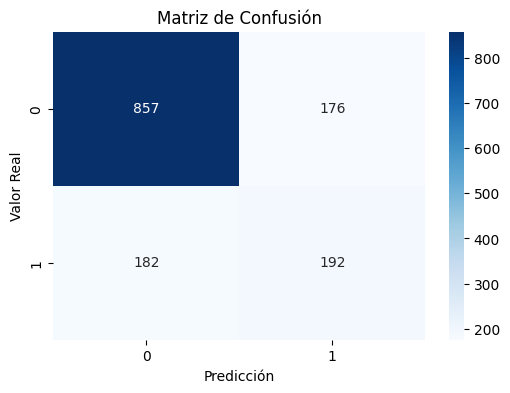

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1033
           1       0.52      0.51      0.52       374

    accuracy                           0.75      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.75      0.74      1407



In [42]:
# Utilizar la función para evaluar el modelo KNN con los mejores hiperparámetros
evaluate_model(best_knn, X_test, y_test)

Accuracy del modelo: 0.79


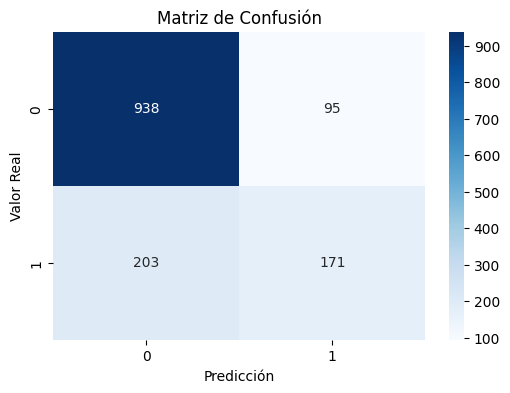

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [41]:
#utlizar la función para evaluar el modelo Decision Tree con los mejores paramtros
evaluate_model(best_tree, X_test, y_test)

Accuracy del modelo: 0.74


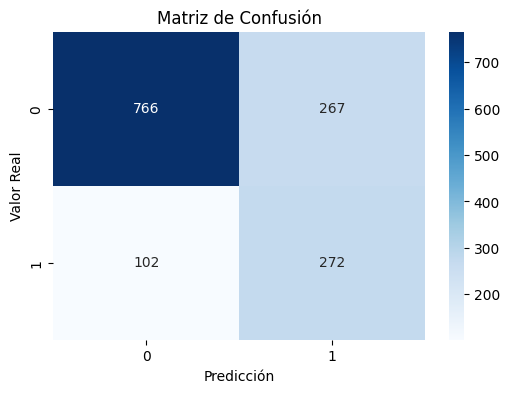

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.50      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407



In [43]:
evaluate_model(best_nb, X_test, y_test)

In [ ]:
#podemos concluir que el modelo Tree decision de tiene un mejor rendimiento.

